# **TAXI MOBILITY SURGE PRICE PREDICTION**

###Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from anywhere in the cities they operate in. They, in turn, search for cabs from various service providers and provide the best option to their clients across available options. They have been in operation for a little less than a year now. During this period, they have captured surge pricing types from the service providers. The main objective is to build a predictive model, which could help them in predicting the surge pricing type proactively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.


###● Trip_ID: ID for TRIP

###● Trip_Distance: The distance for the trip requested by the customer

###● TypeofCab: Category of the cab requested by the customer

###● CustomerSinceMonths: Customer using cab services since n months; 0 month means the current month

###● LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour

###● ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

###● Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.

###● Customer_Rating: Average of lifetime ratings of the customer till date

###● CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

###● Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes

###● Gender: Gender of the customer

###● SurgePricingType: Target (can be of 3 types) - DV

#**Introduction**
###The cab platforms adjust their prices using a specific algorithm which is real time and dynamic known as **“Surge Pricing”** or **“Dynamic Pricing”**. This algorithm automatically raises the price of a trip when the demand increases more than the supply. The surge algorithm generally outputs a multiplier which is adjusted along with the base fare, the price per mile and the price per minute to generate the final price. This price is communicated to the riders and the ride is initiated when they confirm to the price shown. This surge multiplier is kept discrete and may range from 1.2 to the maximum allowed by the government based on geography. 

###Our goal here is to build a predictive model, which could help Sigma Cabs in predicting the surge pricing type proactively.

##**Types of Pricing**
###We have two types of pricing in Cab industry. They are:
###* Static Pricing  &
###* Dynamic Pricing (Surge Pricing)

###The distance and travel time based taxi pricing scheme (Static Pricing) has been prevalent for decades. One major drawback of the current taxi price is that it fails to take the time of day into consideration while the demand in the market is time sensitive. So there is a need of Dynamic pricing.

### **Reasons for surge pricing**
###The reasons for surge pricing are:

* normal peak-hours

* bad weather conditions (rain, snow, etc)
* events (concerts, movie-premiere)
* traffic conditions
* unseen emergencies and so on.

#**How Surge pricing works**

##Demand for rides increases
There are times when so many people are requesting rides that there aren’t enough cars on the road to help take them all. Bad weather, rush hour, and special events, for instance, may cause unusually large numbers of people to want to request a ride with Uber all at the same time.

##Prices go up
In these cases of very high demand, prices may increase to help ensure that those who need a ride can get one. This system is called surge pricing, and it lets the Uber app continue to be a reliable choice.

##Riders pay more or wait
Whenever rates are raised due to surge pricing, the Uber app lets riders know. Some riders will choose to pay, while some will choose to wait a few minutes to see if the rates go back down.

##So far we have seen and build the concepts around Surge pricing. Now let's start some practical implementation with the data.

### **Importing Libraries**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Loading Dataset**

In [ ]:
# Reading dataset
# df=pd.read_csv("/content/drive/MyDrive/Capstone Projects/TAXI MOBILITY SURGE PRICE PREDICTION/Taxi Mobility Surge Price Prediction-20210510T143336Z-001/Taxi Mobility Surge Price Prediction/data_sigma_cabs.csv")

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Projects/Taxi Mobility Surge Price Prediction/data_sigma_cabs.csv'
df=pd.read_csv(path)

In [ ]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


# **Exploratory Data Analysis**

### Let's start with doing some exploratory data analysis.

In [ ]:
#shape of data
df.shape

(131662, 14)

* Dataset have 131662 records and 14 features



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [ ]:
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')


### Trip_ID column seems to be of no use for modelling. So we can simply drop it.

In [ ]:
# Dropping 'Trip_ID' from dataset
df.drop(columns=['Trip_ID'],inplace=True)

### We start with the analysis of our dependent variable Surge_Pricing_Type

In [ ]:
df.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

* Here we can see that it's a Multiclass classification problem having imbalanced target variables.

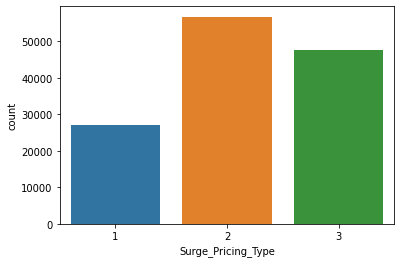

In [ ]:
sns.countplot(df['Surge_Pricing_Type'])

###Let's do some EDA by using fast_ml library

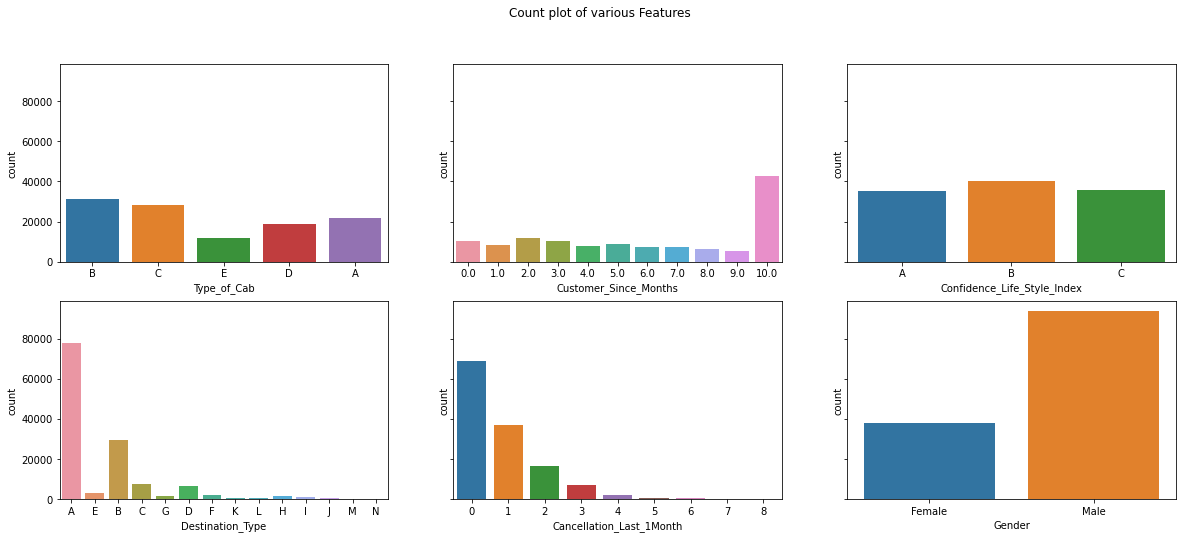

In [ ]:
#let's plot countplots of some features
fig,axes=plt.subplots(2,3, figsize=(20,8),sharey=True)
fig.suptitle('Count plot of various Features')
#1
sns.countplot(ax=axes[0,0],x=df['Type_of_Cab'])
#2
sns.countplot(ax=axes[0,1],x=df['Customer_Since_Months'])
#3
sns.countplot(ax=axes[0,2],x=df['Confidence_Life_Style_Index'])
#4
sns.countplot(ax=axes[1,0],x=df['Destination_Type'])
#5
sns.countplot(ax=axes[1,1],x=df['Cancellation_Last_1Month'])
#6
sns.countplot(ax=axes[1,2],x=df['Gender'])

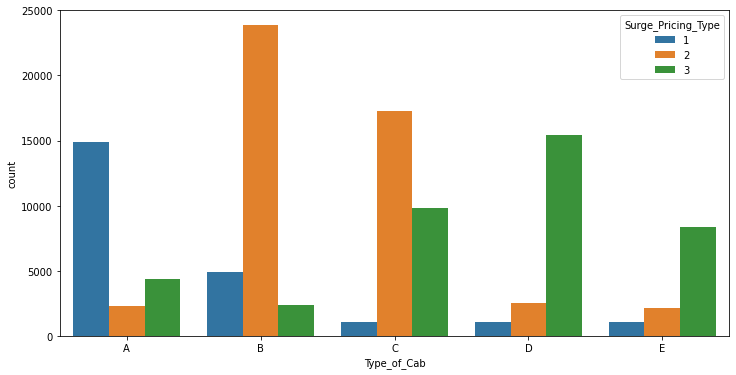

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Type_of_Cab', data = df,order=['A','B','C','D','E'],hue='Surge_Pricing_Type')

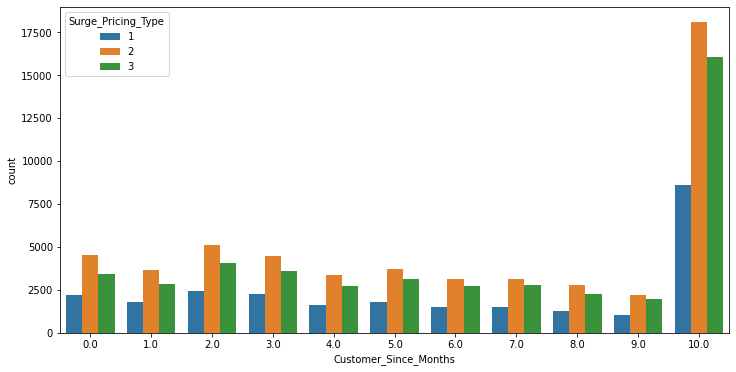

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Customer_Since_Months', data = df,hue='Surge_Pricing_Type')

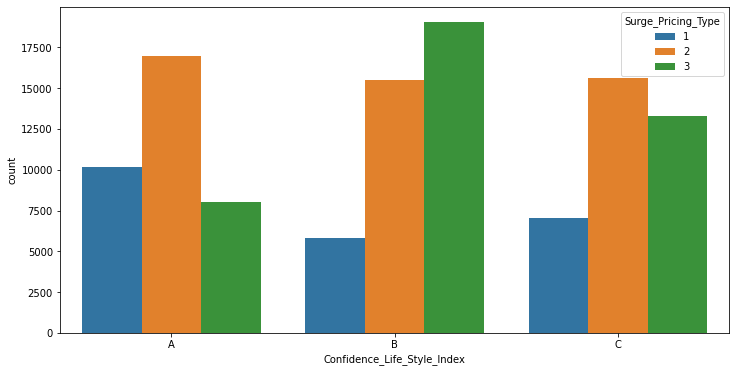

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Confidence_Life_Style_Index', data = df,hue='Surge_Pricing_Type')

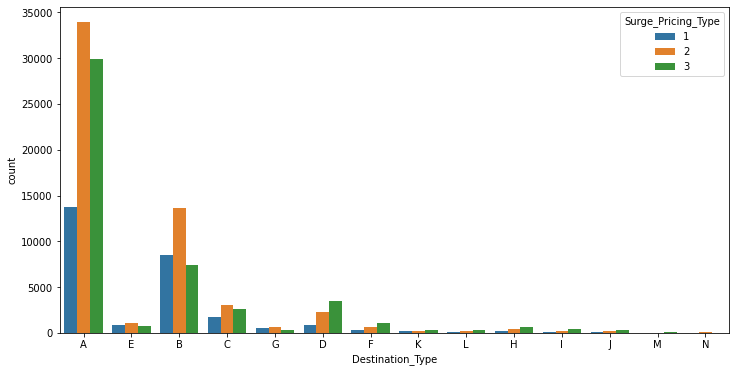

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Destination_Type', data = df,hue='Surge_Pricing_Type')

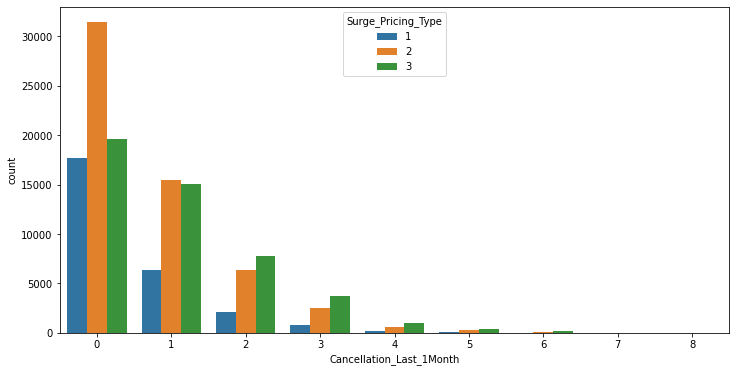

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Cancellation_Last_1Month', data = df,hue='Surge_Pricing_Type')

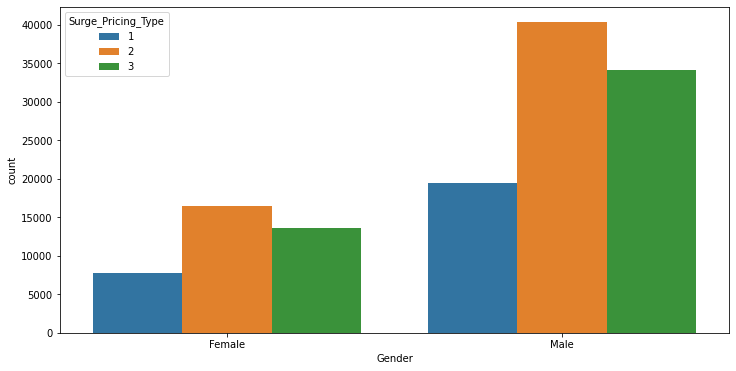

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Gender', data = df,hue='Surge_Pricing_Type')

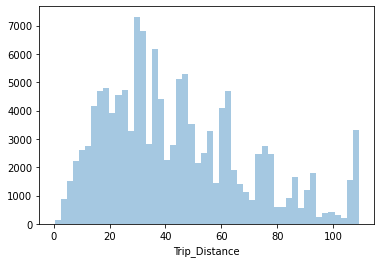

In [ ]:
sns.distplot(df['Trip_Distance'],kde = False,norm_hist=False)

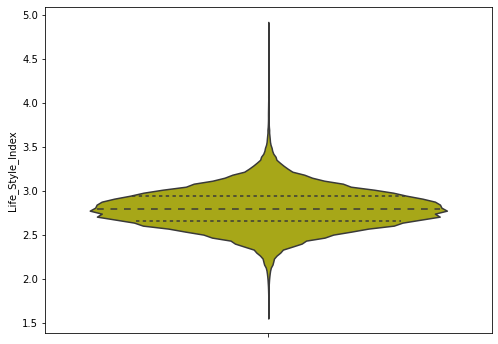

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(y='Life_Style_Index',data=df,inner='quartile',color='y')

## Cleaning the data
* Handling the null values

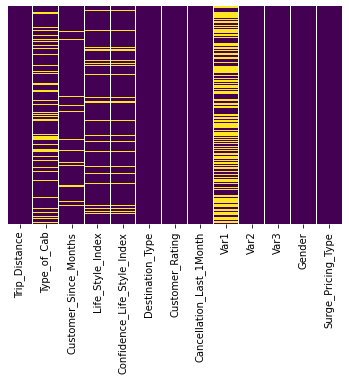

In [ ]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (20, 5)

In [ ]:
# Checking nan values in every column
def nan_check(data):
  '''creating a function that will show percentage of null values in each column'''
  total = data.isnull().sum().sort_values(ascending=False)
  percent_1 = data.isnull().sum()/data.isnull().count()*100
  percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
  missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
  return missing_data

nan_check(df)

,Total,%
Var1,71030,53.9
Type_of_Cab,20210,15.3
Confidence_Life_Style_Index,20193,15.3
Life_Style_Index,20193,15.3
Customer_Since_Months,5920,4.5
Surge_Pricing_Type,0,0.0
Gender,0,0.0
Var3,0,0.0
Var2,0,0.0
Cancellation_Last_1Month,0,0.0


###Our dataset contains null values in following columns:
* Type_of_Cab                    
* Customer_Since_Months           
* Life_Style_Index               
* Confidence_Life_Style_Index    
* Var1                           

### We have more than 54 % null values in Var1 column.
###Hence, we can simply drop var1 column

In [ ]:
#deleting var1 column
del df['Var1']

In [ ]:
nan_check(df)

,Total,%
Type_of_Cab,20210,15.3
Confidence_Life_Style_Index,20193,15.3
Life_Style_Index,20193,15.3
Customer_Since_Months,5920,4.5
Surge_Pricing_Type,0,0.0
Gender,0,0.0
Var3,0,0.0
Var2,0,0.0
Cancellation_Last_1Month,0,0.0
Customer_Rating,0,0.0


* For now i am dropping all those columns having null values as it will not make much impact as our dataset is too large.

In [ ]:
#dropping all those columns having nan values
df.dropna(inplace=True)
df.shape

(90052, 12)

* Now, after dropping all those columns we have about 90000 records in the dataset.

In [ ]:
nan_check(df)

,Total,%
Surge_Pricing_Type,0,0.0
Gender,0,0.0
Var3,0,0.0
Var2,0,0.0
Cancellation_Last_1Month,0,0.0
Customer_Rating,0,0.0
Destination_Type,0,0.0
Confidence_Life_Style_Index,0,0.0
Life_Style_Index,0,0.0
Customer_Since_Months,0,0.0


* **And we have no null values in the new_df**

In [ ]:
df['Surge_Pricing_Type'].value_counts()

2    38918
3    32504
1    18630
Name: Surge_Pricing_Type, dtype: int64

## Now, let's analyse the numerical features of the dataset.

In [ ]:
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000
mean,44.570410,6.009872,2.809990,2.856178,0.786257,51.268834,75.197841,2.154067
std,25.550645,3.627505,0.221479,0.973910,1.041551,4.991620,11.594410,0.737629
min,0.310000,0.000000,1.596380,0.001250,0.000000,40.000000,52.000000,1.000000
25%,24.880000,3.000000,2.661130,2.166250,0.000000,48.000000,67.000000,2.000000
50%,38.450000,6.000000,2.807160,2.903750,0.000000,50.000000,74.000000,2.000000
75%,60.940000,10.000000,2.951590,3.581250,1.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,124.000000,206.000000,3.000000


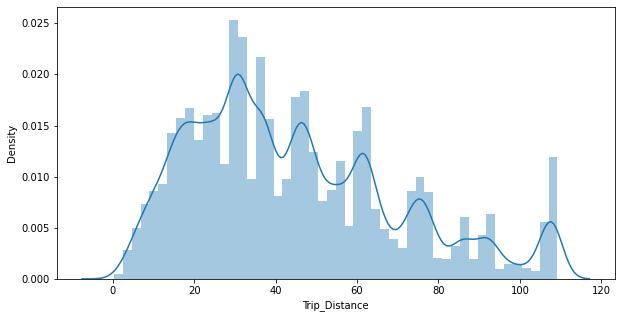

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Trip_Distance'])

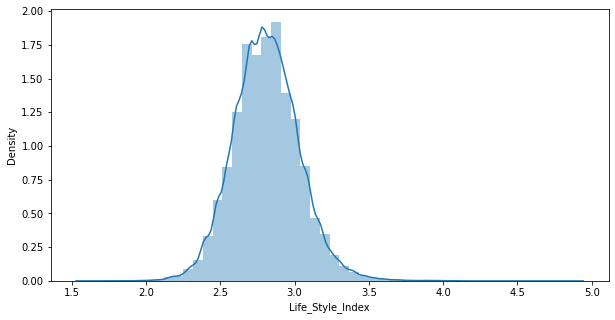

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Life_Style_Index'])

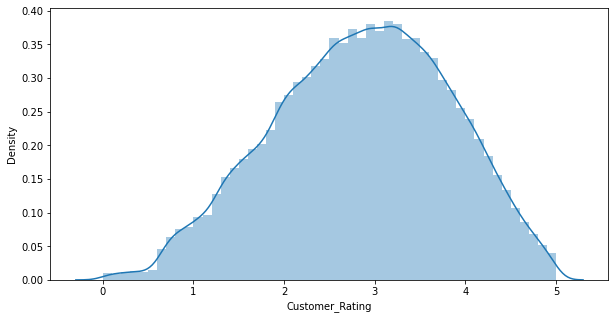

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Customer_Rating'])

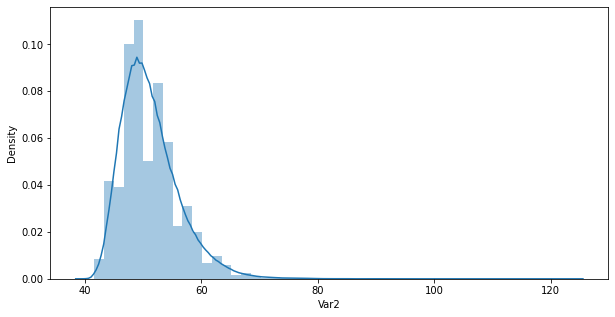

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Var2'])

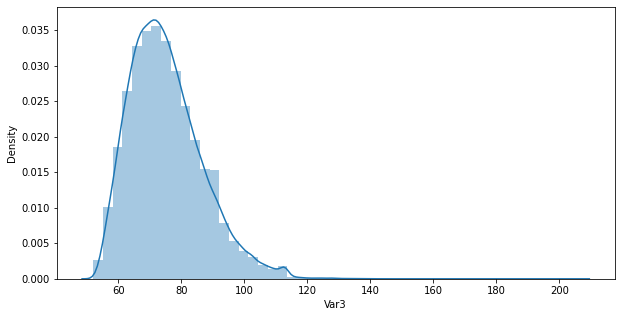

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Var3'])

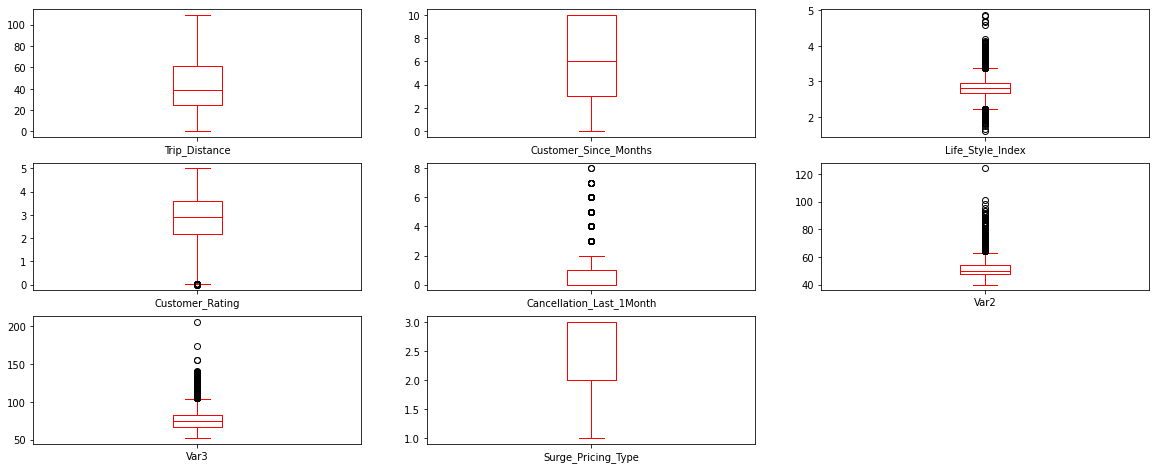

In [ ]:
#Boxplot of numerical columns
df.plot(kind='box', layout=(3,3),subplots=True,figsize=(20,8),color='r')
plt.show()

In [ ]:
df.shape

(90052, 12)

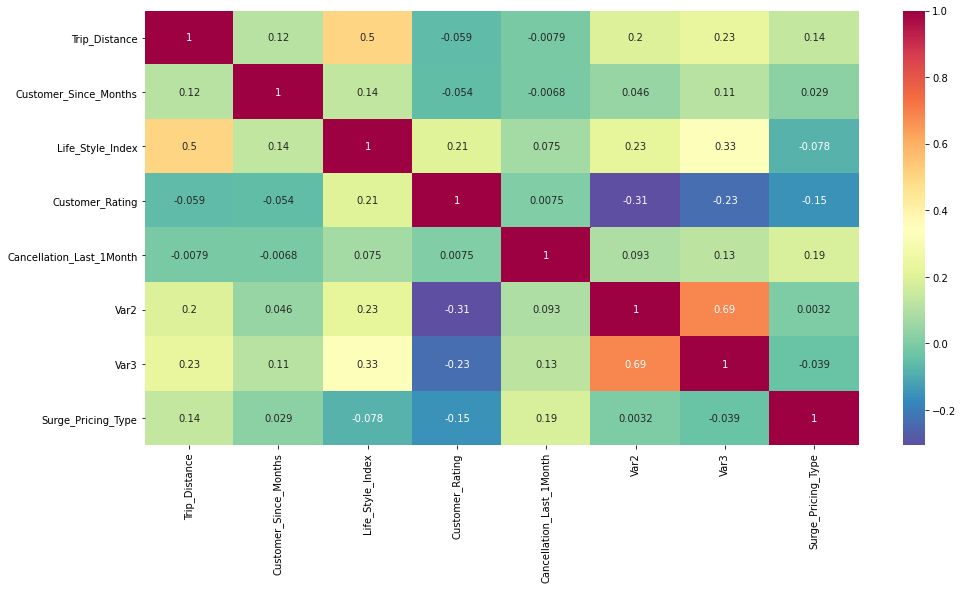

In [ ]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='Spectral_r')

In [ ]:
df.head(2)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.905,0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.450,0,56,78,Male,2


##**Categorical Columns**
* Type_of_Cab
* Confidence_Life_Style_Index  
* Destination_Type             
* Gender                       

In [ ]:
df1=df.copy()

* **Let's deal with Categorical columns**

In [ ]:
# Converting Gender column into numerical features
gender_dict={'Female':0,'Male':1}

df1['Gender']=df1['Gender'].map(gender_dict)

In [ ]:
# One hot encoding
df1= pd.get_dummies(df1, columns=["Type_of_Cab", "Confidence_Life_Style_Index","Destination_Type"], prefix=["cab_type", "confidence_index","destination_type"],drop_first=True)

In [ ]:
#creating a copy of the original df
new_df=df1.copy()

In [ ]:
df1.head(1)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,cab_type_B,cab_type_C,cab_type_D,cab_type_E,confidence_index_B,confidence_index_C,destination_type_B,destination_type_C,destination_type_D,destination_type_E,destination_type_F,destination_type_G,destination_type_H,destination_type_I,destination_type_J,destination_type_K,destination_type_L,destination_type_M,destination_type_N
0,6.77,1.0,2.42769,3.905,0,46,60,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature Selection

* **Let's compare the features**

In [ ]:
X, y = df1.drop('Surge_Pricing_Type',axis=1), df['Surge_Pricing_Type']

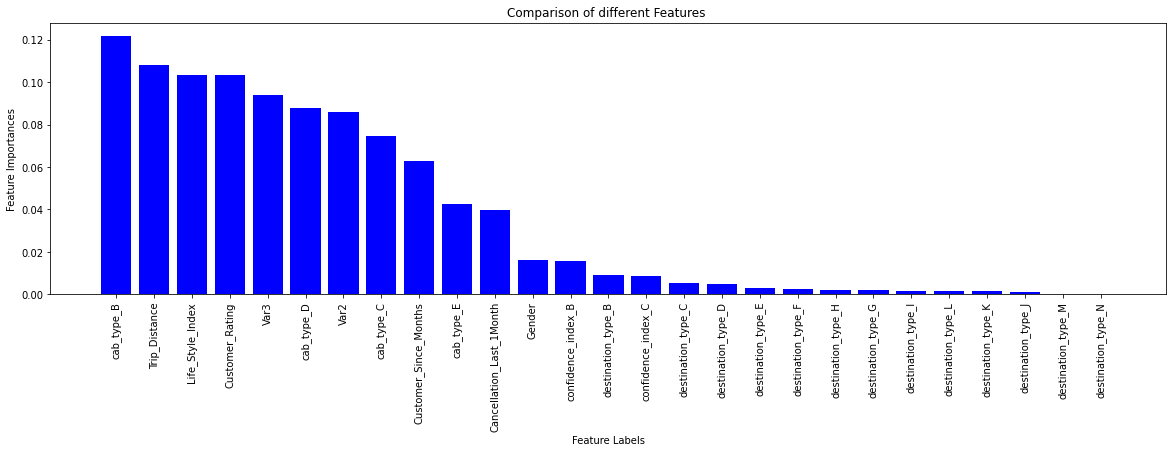

In [ ]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(X,y)
imp_features=pd.Series(ET.feature_importances_,index=X.columns).sort_values(ascending=False)
imp_features
pd.DataFrame(imp_features,columns=['importance'])



# Plotting a Bar Graph to compare the models

plt.bar(imp_features.index,imp_features.values,color='b')
plt.xticks(rotation='vertical')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Features ')
plt.show()

### Now we can apply feature selection here and can drop less important features

##Feature selection for categorical input that has categorical output: Chi-Squared

H0- Categorical features are independent from the surge pricing category

H1- Categorical features are dependent on the surge pricing category

The significance level remains 5% for this.

In [ ]:
df1.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type', 'cab_type_B', 'cab_type_C', 'cab_type_D',
       'cab_type_E', 'confidence_index_B', 'confidence_index_C',
       'destination_type_B', 'destination_type_C', 'destination_type_D',
       'destination_type_E', 'destination_type_F', 'destination_type_G',
       'destination_type_H', 'destination_type_I', 'destination_type_J',
       'destination_type_K', 'destination_type_L', 'destination_type_M',
       'destination_type_N'],
      dtype='object')

In [ ]:
dependent_variable= df1['Surge_Pricing_Type']

categorical_features=['Cancellation_Last_1Month', 'Gender', 'Surge_Pricing_Type',
       'cab_type_B', 'cab_type_C', 'cab_type_D', 'cab_type_E',
       'confidence_index_B', 'confidence_index_C', 'destination_type_B',
       'destination_type_C', 'destination_type_D', 'destination_type_E',
       'destination_type_F', 'destination_type_G', 'destination_type_H',
       'destination_type_I', 'destination_type_J', 'destination_type_K',
       'destination_type_L', 'destination_type_M', 'destination_type_N']
# len(categorical_features)

In [ ]:
from sklearn.feature_selection import chi2
#Defining the dependent variable
dependent_variable= df1['Surge_Pricing_Type']
cat_df=df1[categorical_features]
#Checking the Chi-scores array

chi_scores = chi2(cat_df,dependent_variable)

print(*chi_scores)


[4.36905234e+03 4.13094377e-02 2.27460387e+04 1.24757739e+04
 4.87004575e+03 1.32863060e+04 5.24532842e+03 2.02580837e+03
 3.76378137e+01 1.34049001e+03 3.15790920e+01 5.07458511e+02
 1.20325710e+02 1.97456132e+02 1.56033130e+02 5.68496944e+01
 9.86709681e+01 4.45941173e+01 1.11212377e+01 3.30281828e+01
 6.19917879e+00 2.75409033e+01] [0.00000000e+000 9.79557129e-001 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 6.71510176e-009 8.24694780e-292 1.38895221e-007 6.40891394e-111
 7.44053211e-027 1.32722836e-043 1.31170540e-034 4.52111667e-013
 3.74862083e-022 2.07257597e-010 3.84639540e-003 6.73009568e-008
 4.50677037e-002 1.04608948e-006]


The first array in this array contains chi-square values and the second contains p-values

For our feature selection we should take p-values.

In [ ]:
p_values = pd.Series(chi_scores[1],index = cat_df.columns)
p_values.sort_values(ascending = False , inplace = True)

Text(0.5, 1.0, 'P-values for categorical features')

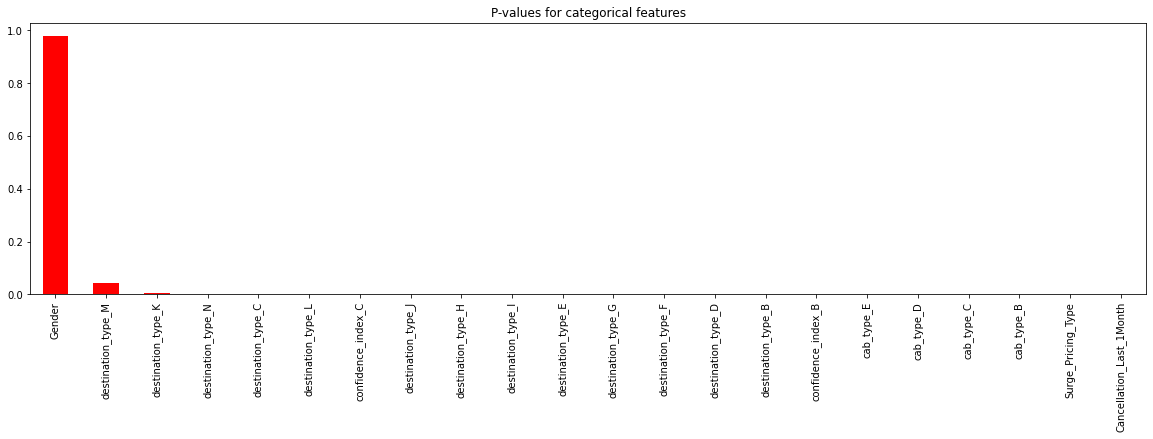

In [ ]:
p_values.plot(kind='bar',color='red')

plt.title('P-values for categorical features')

p-value of gender is very high which means that this variable is independent of the surge pricing and therefore should not be used for model training.

### Feature selection for numerical input that has categorical output: ANOVA

In [ ]:
from sklearn.feature_selection import f_classif, f_regression

In [ ]:
numeric_features=['Trip_Distance','Life_Style_Index','Customer_Rating','Var2','Var3']
numerical_features=df[numeric_features]

In [ ]:
f_scores = f_classif(numerical_features, dependent_variable)
print(f_scores)

(array([1217.74688847,  486.43036071, 1060.66928714,   26.94158871,
        130.88211635]), array([0.00000000e+000, 7.56808447e-211, 0.00000000e+000, 2.00870411e-012,
       1.74211047e-057]))


In [ ]:
#The second array consists of p-values that we need
p_values_n= pd.Series(f_scores[1],index= numerical_features.columns)

Text(0.5, 1.0, 'P-values for numerical features')

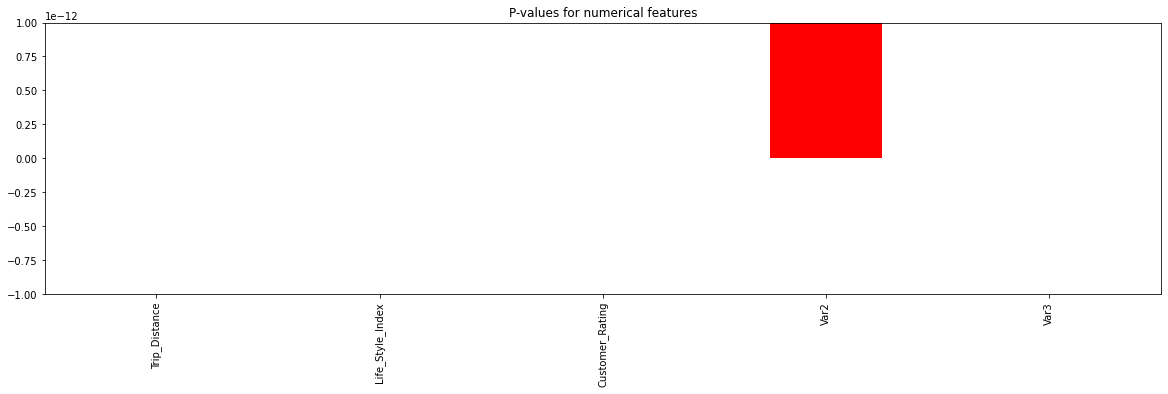

In [ ]:
p_values_n.plot(kind='bar',color='red')

plt.title('P-values for numerical features')

We can drop Variable 2 because of high p-value too.

After Feature Selection we are confident with removing 4 columns:
1. Extra Trees Classifier - Destination_type columns
2. chi2 - Gender
3. ANOVA - Var2

##**Data Preparation**

Defining X (Features) & Y (Labels)

In [ ]:
X=df1[[col for col in df1.columns if col not in ['Surge_Pricing_Type','Gender','Var2','Cancellation_Last_1Month','destination_type_B',
       'destination_type_C', 'destination_type_D', 'destination_type_E',
       'destination_type_F', 'destination_type_G', 'destination_type_H',
       'destination_type_I', 'destination_type_J', 'destination_type_K',
       'destination_type_L', 'destination_type_M', 'destination_type_N']]]
Y=df1['Surge_Pricing_Type']

Implementing Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state =42)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

Metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Implementing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
lr_model=LR(solver='sag',multi_class='ovr')
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr=lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

Accuracy: 71.96%


 Lets try Hyperparameter Tuning using search Algorithms like:
1. GridSearchCV
2. RandomSearchCV
3. BayesianSearchCV

In [ ]:
lr = LR(solver='lbfgs',multi_class='ovr')
param_dict_lr = {
    'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]
}

* **Applying GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict_lr,
                       cv = 5, verbose=2, scoring='accuracy')
#fitting the model
lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] C=1e-06 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... C=1e-06, total=   0.4s
[CV] C=1e-06 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......................................... C=1e-06, total=   0.3s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.3s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.4s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.4s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.2s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.3s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.2s
[CV] C=1e-05 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   21.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 0.001, 10000.0, 100000.0, 1000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [ ]:
#predicting the output
y_pred_tr=lr_grid.predict(X_train)
y_pred_te=lr_grid.predict(X_test)

print('Train Accuracy score : ', accuracy_score(y_train, y_pred_tr)*100)
print('Test Accuracy score : ', accuracy_score(y_test,y_pred_te)*100)
print('\n', classification_report(y_test, y_pred_te))

Train Accuracy score :  71.90956336339003
Test Accuracy score :  72.00284280193667

               precision    recall  f1-score   support

           1       0.73      0.62      0.67      4680
           2       0.70      0.83      0.76      9760
           3       0.75      0.64      0.69      8073

    accuracy                           0.72     22513
   macro avg       0.73      0.70      0.71     22513
weighted avg       0.72      0.72      0.72     22513



In [ ]:
cm=confusion_matrix(y_test,y_pred_te)
cm

array([[2916, 1253,  511],
       [ 429, 8141, 1190],
       [ 658, 2262, 5153]])

Printing best parameters after after tuning

In [ ]:
# print best parameter after tuning
print(lr_grid.best_params_)

{'C': 0.001}


* **Applying RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
lr_random = RandomizedSearchCV(estimator=lr,
                       param_distributions = param_dict_lr,
                       cv = 5, verbose=2)

lr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................. C=10, total=   0.4s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................................. C=10, total=   0.4s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.4s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.4s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.3s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.4s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.4s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.4s
[CV] C=1000000.0 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                              0.1, 1, 10, 100, 0.001, 10000.0,
                                              100000.0, 1000000.0]},
                   pre_dispatch='2*n_jobs', random_st

In [ ]:
y_pred_tr=lr_random.predict(X_train)
y_pred_te=lr_random.predict(X_test)
print('Train Accuracy score : ', accuracy_score(y_train, y_pred_tr)*100)
print('Test Accuracy score : ', accuracy_score(y_test,y_pred_te)*100)
print('\n', classification_report(y_test, y_pred_te))

Train Accuracy score :  71.90956336339003
Test Accuracy score :  72.00284280193667

               precision    recall  f1-score   support

           1       0.73      0.62      0.67      4680
           2       0.70      0.83      0.76      9760
           3       0.75      0.64      0.69      8073

    accuracy                           0.72     22513
   macro avg       0.73      0.70      0.71     22513
weighted avg       0.72      0.72      0.72     22513



In [ ]:
cm=confusion_matrix(y_test,y_pred_te)
cm

array([[2916, 1253,  511],
       [ 429, 8141, 1190],
       [ 658, 2262, 5153]])

In [ ]:
# print best parameter after tuning
print(lr_random.best_params_)

{'C': 0.001}


* **Applying BayesianSearch CV**

In [ ]:
pip install scikit-optimize

     |████████████████████████████████| 102kB 3.3MB/s 


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
lr_bayes = BayesSearchCV(estimator=lr,
                       search_spaces = {'C' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=32)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=502428.4269574442 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=502428.4269574442, total=   0.3s
[CV] C=502428.4269574442 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=502428.4269574442, total=   0.4s
[CV] C=502428.4269574442 .............................................
[CV] .............................. C=502428.4269574442, total=   0.3s
[CV] C=502428.4269574442 .............................................
[CV] .............................. C=502428.4269574442, total=   0.3s
[CV] C=502428.4269574442 .............................................
[CV] .............................. C=502428.4269574442, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=13.18360638678714 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=13.18360638678714, total=   0.4s
[CV] C=13.18360638678714 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=13.18360638678714, total=   0.4s
[CV] C=13.18360638678714 .............................................
[CV] .............................. C=13.18360638678714, total=   0.4s
[CV] C=13.18360638678714 .............................................
[CV] .............................. C=13.18360638678714, total=   0.3s
[CV] C=13.18360638678714 .............................................
[CV] .............................. C=13.18360638678714, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.0004026530279112435 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=0.0004026530279112435, total=   0.3s
[CV] C=0.0004026530279112435 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......................... C=0.0004026530279112435, total=   0.3s
[CV] C=0.0004026530279112435 .........................................
[CV] .......................... C=0.0004026530279112435, total=   0.3s
[CV] C=0.0004026530279112435 .........................................
[CV] .......................... C=0.0004026530279112435, total=   0.3s
[CV] C=0.0004026530279112435 .........................................
[CV] .......................... C=0.0004026530279112435, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=8.051141212306984e-06 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=8.051141212306984e-06, total=   0.3s
[CV] C=8.051141212306984e-06 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......................... C=8.051141212306984e-06, total=   0.3s
[CV] C=8.051141212306984e-06 .........................................
[CV] .......................... C=8.051141212306984e-06, total=   0.3s
[CV] C=8.051141212306984e-06 .........................................
[CV] .......................... C=8.051141212306984e-06, total=   0.3s
[CV] C=8.051141212306984e-06 .........................................
[CV] .......................... C=8.051141212306984e-06, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.006598606306480725 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.006598606306480725, total=   0.4s
[CV] C=0.006598606306480725 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ........................... C=0.006598606306480725, total=   0.3s
[CV] C=0.006598606306480725 ..........................................
[CV] ........................... C=0.006598606306480725, total=   0.3s
[CV] C=0.006598606306480725 ..........................................
[CV] ........................... C=0.006598606306480725, total=   0.4s
[CV] C=0.006598606306480725 ..........................................
[CV] ........................... C=0.006598606306480725, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=34399.139447398935 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=34399.139447398935, total=   0.3s
[CV] C=34399.139447398935 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. C=34399.139447398935, total=   0.4s
[CV] C=34399.139447398935 ............................................
[CV] ............................. C=34399.139447398935, total=   0.3s
[CV] C=34399.139447398935 ............................................
[CV] ............................. C=34399.139447398935, total=   0.3s
[CV] C=34399.139447398935 ............................................
[CV] ............................. C=34399.139447398935, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1.537447449090897e-05 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=1.537447449090897e-05, total=   0.3s
[CV] C=1.537447449090897e-05 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......................... C=1.537447449090897e-05, total=   0.3s
[CV] C=1.537447449090897e-05 .........................................
[CV] .......................... C=1.537447449090897e-05, total=   0.3s
[CV] C=1.537447449090897e-05 .........................................
[CV] .......................... C=1.537447449090897e-05, total=   0.3s
[CV] C=1.537447449090897e-05 .........................................
[CV] .......................... C=1.537447449090897e-05, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=4351.280500668263 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=4351.280500668263, total=   0.3s
[CV] C=4351.280500668263 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=4351.280500668263, total=   0.4s
[CV] C=4351.280500668263 .............................................
[CV] .............................. C=4351.280500668263, total=   0.3s
[CV] C=4351.280500668263 .............................................
[CV] .............................. C=4351.280500668263, total=   0.4s
[CV] C=4351.280500668263 .............................................
[CV] .............................. C=4351.280500668263, total=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=4.979314706226484e-06 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=4.979314706226484e-06, total=   0.3s
[CV] C=4.979314706226484e-06 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......................... C=4.979314706226484e-06, total=   0.3s
[CV] C=4.979314706226484e-06 .........................................
[CV] .......................... C=4.979314706226484e-06, total=   0.3s
[CV] C=4.979314706226484e-06 .........................................
[CV] .......................... C=4.979314706226484e-06, total=   0.3s
[CV] C=4.979314706226484e-06 .........................................
[CV] .......................... C=4.979314706226484e-06, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=74035.41049729458 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=74035.41049729458, total=   0.4s
[CV] C=74035.41049729458 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=74035.41049729458, total=   0.3s
[CV] C=74035.41049729458 .............................................
[CV] .............................. C=74035.41049729458, total=   0.3s
[CV] C=74035.41049729458 .............................................
[CV] .............................. C=74035.41049729458, total=   0.3s
[CV] C=74035.41049729458 .............................................
[CV] .............................. C=74035.41049729458, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.00789796284790451 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=0.00789796284790451, total=   0.3s
[CV] C=0.00789796284790451 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................ C=0.00789796284790451, total=   0.3s
[CV] C=0.00789796284790451 ...........................................
[CV] ............................ C=0.00789796284790451, total=   0.3s
[CV] C=0.00789796284790451 ...........................................
[CV] ............................ C=0.00789796284790451, total=   0.3s
[CV] C=0.00789796284790451 ...........................................
[CV] ............................ C=0.00789796284790451, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=237.8339528255334 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=237.8339528255334, total=   0.3s
[CV] C=237.8339528255334 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=237.8339528255334, total=   0.4s
[CV] C=237.8339528255334 .............................................
[CV] .............................. C=237.8339528255334, total=   0.3s
[CV] C=237.8339528255334 .............................................
[CV] .............................. C=237.8339528255334, total=   0.3s
[CV] C=237.8339528255334 .............................................
[CV] .............................. C=237.8339528255334, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.3468486111840202 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.3468486111840202, total=   0.4s
[CV] C=0.3468486111840202 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................. C=0.3468486111840202, total=   0.4s
[CV] C=0.3468486111840202 ............................................
[CV] ............................. C=0.3468486111840202, total=   0.3s
[CV] C=0.3468486111840202 ............................................
[CV] ............................. C=0.3468486111840202, total=   0.4s
[CV] C=0.3468486111840202 ............................................
[CV] ............................. C=0.3468486111840202, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... C=1000000.0, total=   0.4s
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ...................................... C=1000000.0, total=   0.4s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.3s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.3s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.0076182857792733705 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=0.0076182857792733705, total=   0.3s
[CV] C=0.0076182857792733705 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......................... C=0.0076182857792733705, total=   0.3s
[CV] C=0.0076182857792733705 .........................................
[CV] .......................... C=0.0076182857792733705, total=   0.3s
[CV] C=0.0076182857792733705 .........................................
[CV] .......................... C=0.0076182857792733705, total=   0.4s
[CV] C=0.0076182857792733705 .........................................
[CV] .......................... C=0.0076182857792733705, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=2.3821712581255334 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=2.3821712581255334, total=   0.3s
[CV] C=2.3821712581255334 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. C=2.3821712581255334, total=   0.3s
[CV] C=2.3821712581255334 ............................................
[CV] ............................. C=2.3821712581255334, total=   0.3s
[CV] C=2.3821712581255334 ............................................
[CV] ............................. C=2.3821712581255334, total=   0.3s
[CV] C=2.3821712581255334 ............................................
[CV] ............................. C=2.3821712581255334, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.0025875732377435394 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=0.0025875732377435394, total=   0.3s
[CV] C=0.0025875732377435394 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......................... C=0.0025875732377435394, total=   0.3s
[CV] C=0.0025875732377435394 .........................................
[CV] .......................... C=0.0025875732377435394, total=   0.3s
[CV] C=0.0025875732377435394 .........................................
[CV] .......................... C=0.0025875732377435394, total=   0.3s
[CV] C=0.0025875732377435394 .........................................
[CV] .......................... C=0.0025875732377435394, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=83.83424017107751 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=83.83424017107751, total=   0.3s
[CV] C=83.83424017107751 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. C=83.83424017107751, total=   0.4s
[CV] C=83.83424017107751 .............................................
[CV] .............................. C=83.83424017107751, total=   0.3s
[CV] C=83.83424017107751 .............................................
[CV] .............................. C=83.83424017107751, total=   0.3s
[CV] C=83.83424017107751 .............................................
[CV] .............................. C=83.83424017107751, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1403.5098733230577 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=1403.5098733230577, total=   0.3s
[CV] C=1403.5098733230577 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. C=1403.5098733230577, total=   0.3s
[CV] C=1403.5098733230577 ............................................
[CV] ............................. C=1403.5098733230577, total=   0.3s
[CV] C=1403.5098733230577 ............................................
[CV] ............................. C=1403.5098733230577, total=   0.3s
[CV] C=1403.5098733230577 ............................................
[CV] ............................. C=1403.5098733230577, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.0011989228272033961 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=0.0011989228272033961, total=   0.3s
[CV] C=0.0011989228272033961 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......................... C=0.0011989228272033961, total=   0.3s
[CV] C=0.0011989228272033961 .........................................
[CV] .......................... C=0.0011989228272033961, total=   0.3s
[CV] C=0.0011989228272033961 .........................................
[CV] .......................... C=0.0011989228272033961, total=   0.3s
[CV] C=0.0011989228272033961 .........................................
[CV] .......................... C=0.0011989228272033961, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.0012719597317492632 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=0.0012719597317492632, total=   0.3s
[CV] C=0.0012719597317492632 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......................... C=0.0012719597317492632, total=   0.3s
[CV] C=0.0012719597317492632 .........................................
[CV] .......................... C=0.0012719597317492632, total=   0.3s
[CV] C=0.0012719597317492632 .........................................
[CV] .......................... C=0.0012719597317492632, total=   0.3s
[CV] C=0.0012719597317492632 .........................................
[CV] .......................... C=0.0012719597317492632, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.10229091548364266 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=0.10229091548364266, total=   0.3s
[CV] C=0.10229091548364266 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................ C=0.10229091548364266, total=   0.4s
[CV] C=0.10229091548364266 ...........................................
[CV] ............................ C=0.10229091548364266, total=   0.3s
[CV] C=0.10229091548364266 ...........................................
[CV] ............................ C=0.10229091548364266, total=   0.3s
[CV] C=0.10229091548364266 ...........................................
[CV] ............................ C=0.10229091548364266, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... C=1000000.0, total=   0.3s
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................................... C=1000000.0, total=   0.4s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.4s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.3s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1.4239974032911475 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=1.4239974032911475, total=   0.3s
[CV] C=1.4239974032911475 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. C=1.4239974032911475, total=   0.4s
[CV] C=1.4239974032911475 ............................................
[CV] ............................. C=1.4239974032911475, total=   0.3s
[CV] C=1.4239974032911475 ............................................
[CV] ............................. C=1.4239974032911475, total=   0.3s
[CV] C=1.4239974032911475 ............................................
[CV] ............................. C=1.4239974032911475, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.00037067583660526634 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... C=0.00037067583660526634, total=   0.3s
[CV] C=0.00037067583660526634 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ......................... C=0.00037067583660526634, total=   0.3s
[CV] C=0.00037067583660526634 ........................................
[CV] ......................... C=0.00037067583660526634, total=   0.3s
[CV] C=0.00037067583660526634 ........................................
[CV] ......................... C=0.00037067583660526634, total=   0.3s
[CV] C=0.00037067583660526634 ........................................
[CV] ......................... C=0.00037067583660526634, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=183996.03109168273 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=183996.03109168273, total=   0.3s
[CV] C=183996.03109168273 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. C=183996.03109168273, total=   0.4s
[CV] C=183996.03109168273 ............................................
[CV] ............................. C=183996.03109168273, total=   0.3s
[CV] C=183996.03109168273 ............................................
[CV] ............................. C=183996.03109168273, total=   0.3s
[CV] C=183996.03109168273 ............................................
[CV] ............................. C=183996.03109168273, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.04962435648000882 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=0.04962435648000882, total=   0.3s
[CV] C=0.04962435648000882 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................ C=0.04962435648000882, total=   0.4s
[CV] C=0.04962435648000882 ...........................................
[CV] ............................ C=0.04962435648000882, total=   0.3s
[CV] C=0.04962435648000882 ...........................................
[CV] ............................ C=0.04962435648000882, total=   0.3s
[CV] C=0.04962435648000882 ...........................................
[CV] ............................ C=0.04962435648000882, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=10642.005893759391 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=10642.005893759391, total=   0.4s
[CV] C=10642.005893759391 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................. C=10642.005893759391, total=   0.3s
[CV] C=10642.005893759391 ............................................
[CV] ............................. C=10642.005893759391, total=   0.3s
[CV] C=10642.005893759391 ............................................
[CV] ............................. C=10642.005893759391, total=   0.3s
[CV] C=10642.005893759391 ............................................
[CV] ............................. C=10642.005893759391, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=22.610398481497626 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=22.610398481497626, total=   0.4s
[CV] C=22.610398481497626 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................. C=22.610398481497626, total=   0.4s
[CV] C=22.610398481497626 ............................................
[CV] ............................. C=22.610398481497626, total=   0.4s
[CV] C=22.610398481497626 ............................................
[CV] ............................. C=22.610398481497626, total=   0.4s
[CV] C=22.610398481497626 ............................................
[CV] ............................. C=22.610398481497626, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=592.4759780300286 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=592.4759780300286, total=   0.3s
[CV] C=592.4759780300286 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .............................. C=592.4759780300286, total=   0.4s
[CV] C=592.4759780300286 .............................................
[CV] .............................. C=592.4759780300286, total=   0.3s
[CV] C=592.4759780300286 .............................................
[CV] .............................. C=592.4759780300286, total=   0.4s
[CV] C=592.4759780300286 .............................................
[CV] .............................. C=592.4759780300286, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.00032728149092082825 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... C=0.00032728149092082825, total=   0.3s
[CV] C=0.00032728149092082825 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ......................... C=0.00032728149092082825, total=   0.3s
[CV] C=0.00032728149092082825 ........................................
[CV] ......................... C=0.00032728149092082825, total=   0.2s
[CV] C=0.00032728149092082825 ........................................
[CV] ......................... C=0.00032728149092082825, total=   0.3s
[CV] C=0.00032728149092082825 ........................................
[CV] ......................... C=0.00032728149092082825, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.39474311828767855 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=0.39474311828767855, total=   0.3s
[CV] C=0.39474311828767855 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................ C=0.39474311828767855, total=   0.4s
[CV] C=0.39474311828767855 ...........................................
[CV] ............................ C=0.39474311828767855, total=   0.3s
[CV] C=0.39474311828767855 ...........................................
[CV] ............................ C=0.39474311828767855, total=   0.3s
[CV] C=0.39474311828767855 ...........................................
[CV] ............................ C=0.39474311828767855, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                           fit_intercept=True,
                                           intercept_scaling=1, l1_ratio=None,
                                           max_iter=100, multi_class='ovr',
                                           n_jobs=None, penalty='l2',
                                           random_state=None, solver='lbfgs',
                                           tol=0.0001, verbose=0,
                                           warm_start=False),
              fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='identity')},
              verbose=2)

In [ ]:
y_pred_tr=lr_bayes.predict(X_train)
y_pred_te=lr_bayes.predict(X_test)
print('Train Accuracy score : ', accuracy_score(y_train, y_pred_tr)*100)
print('Test Accuracy score : ', accuracy_score(y_test,y_pred_te)*100)

Train Accuracy score :  71.90216023334666
Test Accuracy score :  72.01172655798872


In [ ]:
#classification_report on train set
print('\n', classification_report(y_train, y_pred_tr))


               precision    recall  f1-score   support

           1       0.72      0.63      0.67     13950
           2       0.70      0.83      0.76     29158
           3       0.75      0.64      0.69     24431

    accuracy                           0.72     67539
   macro avg       0.72      0.70      0.71     67539
weighted avg       0.72      0.72      0.72     67539



In [ ]:
#classification_report on test set
print('\n', classification_report(y_test, y_pred_te))


               precision    recall  f1-score   support

           1       0.72      0.63      0.67      4680
           2       0.70      0.83      0.76      9760
           3       0.75      0.64      0.69      8073

    accuracy                           0.72     22513
   macro avg       0.73      0.70      0.71     22513
weighted avg       0.72      0.72      0.72     22513



In [ ]:
cm_tr=confusion_matrix(y_train,y_pred_tr)
cm_tr

array([[ 8799,  3601,  1550],
       [ 1256, 24202,  3700],
       [ 2245,  6625, 15561]])

In [ ]:
cm_te=confusion_matrix(y_test,y_pred_te)
cm_te

array([[2933, 1253,  494],
       [ 436, 8139, 1185],
       [ 678, 2255, 5140]])

# Let's apply SVM Multiclass Classification

**Importing Library**

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

**1. Using Linear Kernel**

In [ ]:
svm_model_linear = svm.SVC(kernel = 'linear', C = 1,decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
linear_pred = svm_model_linear.predict(X_test)

**Evaluation metrics of linear_svm_model**

In [ ]:
#checking the accuracy of linear_svm_model
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))

Accuracy (Linear Kernel):  71.55
F1 (Linear Kernel):  71.05


**2. Using RBF kernel**

In [ ]:
svm_model_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1,decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
rbf_pred = svm_model_rbf.predict(X_test)

**Evaluation metrics of rbf_svm_model**

In [ ]:
#checking the accuracy of rbf_svm_model
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  72.46
F1 (RBF Kernel):  72.17


**3. Using Poly Kernel**

In [ ]:
svm_model_poly = svm.SVC(kernel='poly', degree=3, C=1,decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
poly_pred = svm_model_poly.predict(X_test)

**Evaluation metrics of poly_svm_model**

In [ ]:
cm=confusion_matrix(y_test,poly_pred)
print(cm)

[[2900 1257  523]
 [ 434 8358  968]
 [ 649 2496 4928]]


In [ ]:
#checking the accuracy of poly_svm_model
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Poly Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Poly Kernel): ', "%.2f" % (poly_f1*100))
print('\n', classification_report(y_test, poly_pred))

Accuracy (Poly Kernel):  71.90
F1 (Poly Kernel):  71.44

               precision    recall  f1-score   support

           1       0.73      0.62      0.67      4680
           2       0.69      0.86      0.76      9760
           3       0.77      0.61      0.68      8073

    accuracy                           0.72     22513
   macro avg       0.73      0.70      0.70     22513
weighted avg       0.73      0.72      0.71     22513



##**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators = 10,max_depth=8, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#accuracy of train data
y_pred_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7267504700987577

In [ ]:
#accuracy of test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7238484431217519

###**Let's try some hyperparameter tuning in Random Forest Classifier model**

In [ ]:
rf = RandomForestClassifier()

In [ ]:
param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

* **Applying Gridsearch cv**

In [ ]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   2.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 15.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 100}

In [ ]:
y_pred_tr=rf_grid.predict(X_train)
y_pred_te=rf_grid.predict(X_test)
print('Train Accuracy score : ', accuracy_score(y_train, y_pred_tr)*100)
print('Test Accuracy score : ', accuracy_score(y_test,y_pred_te)*100)
print('\n', classification_report(y_test, y_pred_te))

Train Accuracy score :  72.55215505115564
Test Accuracy score :  72.45147248256562

               precision    recall  f1-score   support

           1       0.74      0.61      0.67      4680
           2       0.70      0.84      0.76      9760
           3       0.75      0.65      0.70      8073

    accuracy                           0.72     22513
   macro avg       0.73      0.70      0.71     22513
weighted avg       0.73      0.72      0.72     22513



* **Applying RandomSearch CV**

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 5, verbose=2, scoring='accuracy')

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8, total=   2.9s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8, total=   2.6s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8, total=   2.7s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8, total=   2.7s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8, total=   2.6s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   2.2s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   2.2s
[CV] n_estimators=50, min_samples_split=50, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 80}

In [ ]:
y_pred_tr=rf_random.predict(X_train)
y_pred_te=rf_random.predict(X_test)
print('Train Accuracy score : ', accuracy_score(y_train, y_pred_tr)*100)
print('Test Accuracy score : ', accuracy_score(y_test,y_pred_te)*100)
print('\n', classification_report(y_test, y_pred_te))

Train Accuracy score :  72.65135699373695
Test Accuracy score :  72.39816994625328

               precision    recall  f1-score   support

           1       0.75      0.60      0.67      4680
           2       0.70      0.84      0.76      9760
           3       0.74      0.66      0.70      8073

    accuracy                           0.72     22513
   macro avg       0.73      0.70      0.71     22513
weighted avg       0.73      0.72      0.72     22513



* **BayesianSearchCV**

In [ ]:
rf_bayes = BayesSearchCV(estimator=rf,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='accuracy')

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31, total=   1.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31, total=   1.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31, total=   1.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31, total=   1.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=61, n_estimators=31, total=   2.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59, total=   2.5s
[CV] max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59, total=   2.5s
[CV] max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59 
[CV]  max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59, total=   2.5s
[CV] max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59 
[CV]  max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59, total=   2.7s
[CV] max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59 
[CV]  max_depth=5, min_samples_leaf=51, min_samples_split=115, n_estimators=59, total=   2.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16, total=   0.6s
[CV] max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16, total=   0.7s
[CV] max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16 
[CV]  max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16, total=   0.7s
[CV] max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16 
[CV]  max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16, total=   0.6s
[CV] max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16 
[CV]  max_depth=5, min_samples_leaf=36, min_samples_split=136, n_estimators=16, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12, total=   0.6s
[CV] max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12, total=   0.6s
[CV] max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12 
[CV]  max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12, total=   0.5s
[CV] max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12 
[CV]  max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12, total=   0.6s
[CV] max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12 
[CV]  max_depth=6, min_samples_leaf=15, min_samples_split=70, n_estimators=12, total=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31, total=   1.2s
[CV] max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31, total=   1.3s
[CV] max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31 
[CV]  max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31, total=   1.4s
[CV] max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31 
[CV]  max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31, total=   1.1s
[CV] max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31 
[CV]  max_depth=4, min_samples_leaf=80, min_samples_split=103, n_estimators=31, total=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30, total=   1.5s
[CV] max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30, total=   1.4s
[CV] max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30, total=   1.5s
[CV] max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30, total=   1.5s
[CV] max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=54, min_samples_split=103, n_estimators=30, total=   1.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55, total=   3.0s
[CV] max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55, total=   3.0s
[CV] max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55 
[CV]  max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55, total=   2.9s
[CV] max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55 
[CV]  max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55, total=   2.6s
[CV] max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55 
[CV]  max_depth=7, min_samples_leaf=41, min_samples_split=149, n_estimators=55, total=   2.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20, total=   0.8s
[CV] max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20, total=   1.0s
[CV] max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20, total=   0.9s
[CV] max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20, total=   0.8s
[CV] max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=11, min_samples_split=86, n_estimators=20, total=   0.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29, total=   1.2s
[CV] max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29, total=   1.3s
[CV] max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29 
[CV]  max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29, total=   1.1s
[CV] max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29 
[CV]  max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29, total=   1.3s
[CV] max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29 
[CV]  max_depth=5, min_samples_leaf=48, min_samples_split=109, n_estimators=29, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64, total=   2.9s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64, total=   2.8s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64, total=   2.7s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64, total=   2.6s
[CV] max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64 
[CV]  max_depth=5, min_samples_leaf=35, min_samples_split=88, n_estimators=64, total=   2.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   5.4s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   5.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97, total=   5.3s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97, total=   5.2s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97, total=   5.1s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97, total=   5.5s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=97, total=   5.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   6.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10, total=   0.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10, total=   0.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=10, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.4s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.4s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.9s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14, total=   0.9s
[CV] max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14, total=   0.9s
[CV] max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14, total=   0.9s
[CV] max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14, total=   0.7s
[CV] max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=96, min_samples_split=52, n_estimators=14, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100, total=   5.9s
[CV] max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100, total=   5.9s
[CV] max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100, total=   5.5s
[CV] max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=23, min_samples_split=146, n_estimators=100, total=   5.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18, total=   1.2s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18, total=   1.1s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18, total=   1.1s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18, total=   0.9s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=18, total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12, total=   0.8s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12, total=   0.7s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12, total=   0.7s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12, total=   0.8s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=150, n_estimators=12, total=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94, total=   5.6s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94, total=   5.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94, total=   5.4s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94, total=   5.2s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=94, total=   5.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17, total=   1.1s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17, total=   0.9s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17, total=   0.9s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17, total=   1.1s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=145, n_estimators=17, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100, total=   6.0s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=53, n_estimators=100, total=   5.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98, total=   5.7s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98, total=   5.6s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98, total=   5.7s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98, total=   5.4s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=56, n_estimators=98, total=   5.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   6.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13, total=   0.8s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13, total=   0.7s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13, total=   0.7s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13, total=   0.7s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=145, n_estimators=13, total=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14, total=   0.9s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14, total=   0.8s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14, total=   0.9s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14, total=   0.8s
[CV] max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=18, min_samples_split=52, n_estimators=14, total=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100, total=   5.4s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100, total=   5.5s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=141, n_estimators=100, total=   5.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11, total=   0.6s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=147, n_estimators=11, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=53, n_estimators=10, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.5s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   6.1s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=50, n_estimators=100, total=   5.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19, total=   1.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19, total=   1.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19, total=   1.1s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19, total=   1.1s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=54, n_estimators=19, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100, total=   3.7s
[CV] max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100, total=   3.3s
[CV] max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100, total=   3.2s
[CV] max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100, total=   3.9s
[CV] max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=99, min_samples_split=58, n_estimators=100, total=   3.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12, total=   0.8s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12, total=   0.7s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12, total=   0.6s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12, total=   0.6s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=58, n_estimators=12, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100, total=   6.1s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=149, n_estimators=100, total=   5.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14, total=   0.8s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14, total=   0.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14, total=   0.9s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14, total=   0.8s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=138, n_estimators=14, total=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   5.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96, total=   5.5s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96, total=   5.2s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96, total=   5.3s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96, total=   5.5s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=148, n_estimators=96, total=   5.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10, total=   0.7s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=149, n_estimators=10, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=15, min_samples_split=55, n_estimators=11, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99, total=   5.6s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99, total=   5.3s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99, total=   5.2s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99, total=   5.4s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=142, n_estimators=99, total=   5.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11, total=   0.7s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11, total=   0.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11, total=   0.6s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=54, n_estimators=11, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   5.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98, total=   5.6s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98, total=   5.5s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98, total=   5.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98, total=   5.6s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=54, n_estimators=98, total=   5.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10, total=   0.7s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10, total=   0.6s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10, total=   0.7s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=54, n_estimators=10, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11, total=   0.6s
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11, total=   0.6s
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11, total=   0.6s
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11, total=   0.6s
[CV] max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=14, min_samples_split=52, n_estimators=11, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=...
              refit=True, return_train_score=False, scoring='accuracy',
              search_spaces

In [ ]:
rf_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 50),
             ('n_estimators', 100)])

In [ ]:
y_pred_tr=rf_bayes.predict(X_train)
y_pred_te=rf_bayes.predict(X_test)
print('Train Accuracy score : ', accuracy_score(y_train, y_pred_tr)*100)
print('Test Accuracy score : ', accuracy_score(y_test,y_pred_te)*100)
print('\n', classification_report(y_test, y_pred_te))

Train Accuracy score :  72.58028694532048
Test Accuracy score :  72.38040243414916

               precision    recall  f1-score   support

           1       0.73      0.62      0.67      4680
           2       0.70      0.84      0.76      9760
           3       0.76      0.64      0.70      8073

    accuracy                           0.72     22513
   macro avg       0.73      0.70      0.71     22513
weighted avg       0.73      0.72      0.72     22513



### Even by using hyperparameter tunning, we are not achieving that much change in scores

##**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(probability=True,random_state=0)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', probability=True,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_y_predict_tr = xgb_model.predict(X_train)
xgb_y_predict_te = xgb_model.predict(X_test)
cm=confusion_matrix(y_test,xgb_y_predict)
cm

array([[2888, 1245,  547],
       [ 409, 8038, 1313],
       [ 613, 2105, 5355]])

In [ ]:
print('\n', classification_report(y_test, xgb_y_predict_te))


               precision    recall  f1-score   support

           1       0.74      0.62      0.67      4680
           2       0.71      0.82      0.76      9760
           3       0.74      0.66      0.70      8073

    accuracy                           0.72     22513
   macro avg       0.73      0.70      0.71     22513
weighted avg       0.73      0.72      0.72     22513



In [ ]:
xgb_accuracy = accuracy_score(y_train, xgb_y_predict_tr)
xgb_accuracy*100

72.5669613112424

In [ ]:
xgb_accuracy = accuracy_score(y_test, xgb_y_predict_te)
xgb_accuracy*100

72.31821614178475

##**Implementing SHAP Values:**

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 7.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=f42bd4bd2dc7539c6751f77ba816afa48893e04e3e13c5c57d2cd70d4010437b
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

# Need to load JS vis in the notebook
shap.initjs()

Separate x and y values so that I don't miss out on older information:

In [ ]:
x=df1[[col for col in df1.columns if col not in ['Surge_Pricing_Type','Gender','Var2']]]
y=df1['Surge_Pricing_Type']

In [ ]:
x.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var3', 'cab_type_B',
       'cab_type_C', 'cab_type_D', 'cab_type_E', 'confidence_index_B',
       'confidence_index_C', 'destination_type_B', 'destination_type_C',
       'destination_type_D', 'destination_type_E', 'destination_type_F',
       'destination_type_G', 'destination_type_H', 'destination_type_I',
       'destination_type_J', 'destination_type_K', 'destination_type_L',
       'destination_type_M', 'destination_type_N'],
      dtype='object')

In [ ]:
# creating the training and validation set
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=.25, random_state=42)


In [ ]:
rf_explainer = shap.TreeExplainer(classifier)
shap_values_rf = rf_explainer.shap_values(x_train_new)

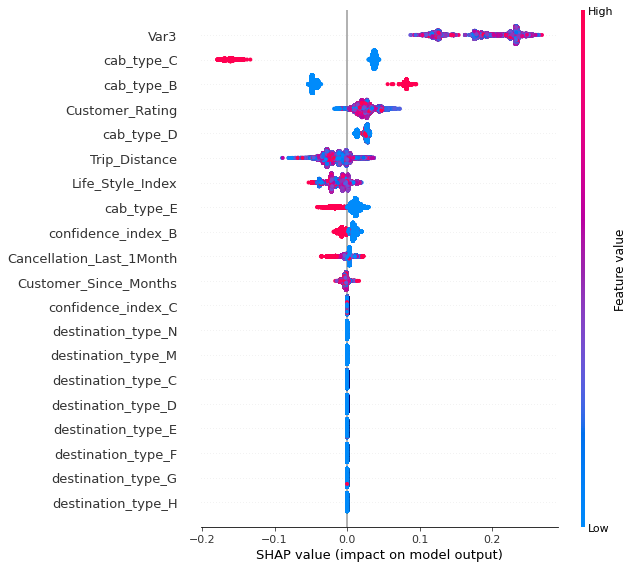

In [ ]:
shap.summary_plot(shap_values_rf[1], features=x_train_new, feature_names=x_train_new.columns)

**We can see how features are contributing to our model from this shap plot**

##Hyper_parameter tuning after Shap values:

In [ ]:
#train test split for x again 
x_train,x_test= train_test_split(x,test_size= 0.25,random_state=42)

In [ ]:
x= x.drop(columns=['Customer_Since_Months','destination_type_N','destination_type_M','destination_type_C','destination_type_D','destination_type_E','destination_type_F','destination_type_G','destination_type_H'])

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model_shap = RandomForestClassifier()

In [ ]:
#Random search
rf_random_shap = RandomizedSearchCV(rf_model_shap,param_dict,verbose=2,cv=5)

In [ ]:
rf_random_shap.fit(x_train,y_train_new)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   3.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   3.0s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   3.0s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   3.0s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   2.8s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   3.3s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   3.1s
[CV] n_estimators=80, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#Building optimal model on the best estimators
rf_optimal_model_shap = rf_random_shap.best_estimator_

In [ ]:
# make predictions for test data
y_pred_r_shap = rf_optimal_model_shap.predict(x_test)

In [ ]:
# Training accuracy
accuracy_score(y_train_new, rf_optimal_model_shap.predict(x_train))*100

73.00818786182798

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test_new, y_pred_r_shap)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.78%


In [ ]:
print("Precision:", precision_score(y_test_new,y_pred_r_shap,average='macro')*100)

Precision: 73.91793814229372


In [ ]:
print('\n', classification_report(y_test_new, y_pred_r_shap))


               precision    recall  f1-score   support

           1       0.76      0.60      0.67      4680
           2       0.70      0.84      0.77      9760
           3       0.75      0.66      0.71      8073

    accuracy                           0.73     22513
   macro avg       0.74      0.70      0.71     22513
weighted avg       0.73      0.73      0.72     22513



#**Conclusion** 
###Starting with loading the data so far we have done EDA , null values treatment, encoding of categorical columns, feature selection and then model building.
###In all of these models our accuracy revolves in the range of 70 to 74%. And there is no such improvement in accuracy score even after hyperparameter tuning. So the accuracy of our best model is 73% which can be said to be good for this large dataset. This performance could be due to various reasons like: no proper pattern of data, too much data, not enough relevant features.

###**Business Prospective of the model**
###At the end we reached our goal and build a predictive model which can help Sigma Cabs in predicting Surge Pricing Types proactively.
###This will help them in matching the right cab with the right customer quickly and efficiently and they can increase their customer base and profit by providing better services.

